In [2]:
from data_ingest import get_data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import datetime as dt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = get_data('SPY', '2015-01-01', dt.date.today())
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume
0,2015-01-02,172.592911,173.811145,171.542718,173.391068,121465900
1,2015-01-05,169.475906,171.702310,169.165053,171.534282,169632600
2,2015-01-06,167.879684,170.316127,167.073130,169.786826,209151400
3,2015-01-07,169.971588,170.316054,168.770174,169.223851,125346700
4,2015-01-08,172.987762,173.206211,171.383078,171.399871,147217800


### Data Summary

In [4]:
# def describe(df: pd.DataFrame):
#     for col in df.select_dtypes(include=['int64', 'float64']).columns.values:
#         print(df[col].skew())
#         print(df[col].kurtosis())
#         print(df[col].describe())
#         plt.boxplot(df[col])
#         plt.tight_layout()
#         plt.show()
#     return df

# describe(df)


        
        

### Univariate Analysis

Open : mean: 314.8221, std: 116.6607, skew: 0.5550
High : mean: 316.4817, std: 117.2319, skew: 0.5491
Low : mean: 312.9185, std: 116.0083, skew: 0.5615
Close : mean: 314.7811, std: 116.6676, skew: 0.5563
Volume : mean: 87321857.3693, std: 44886310.2456, skew: 2.4937


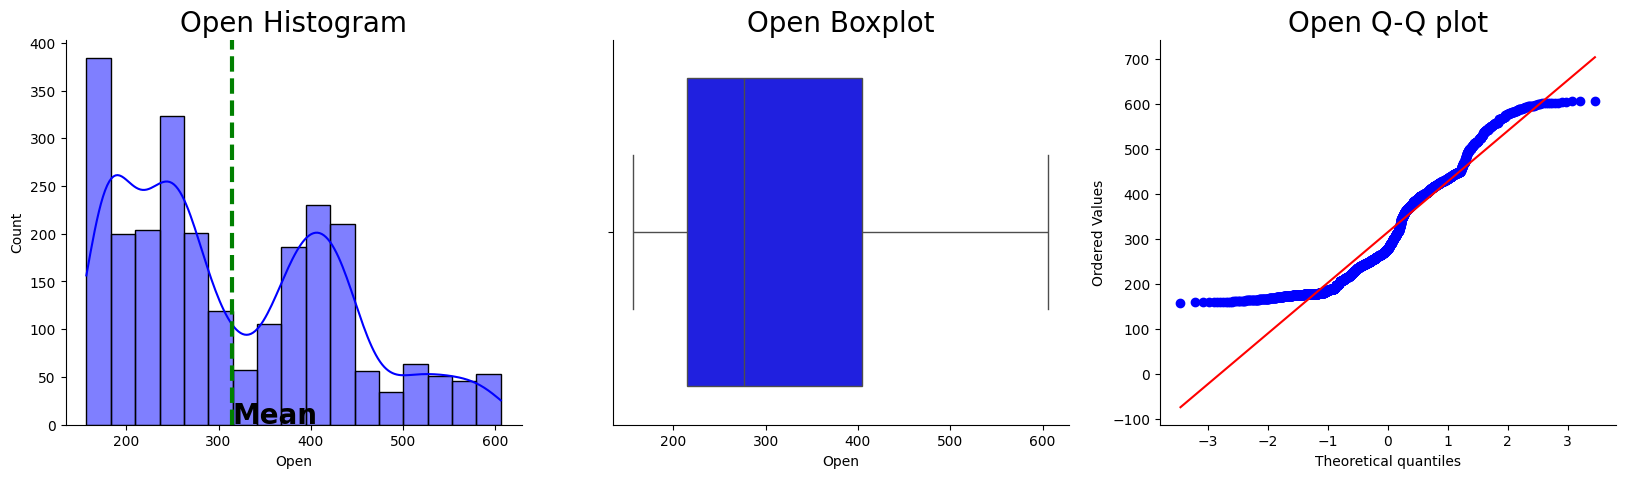

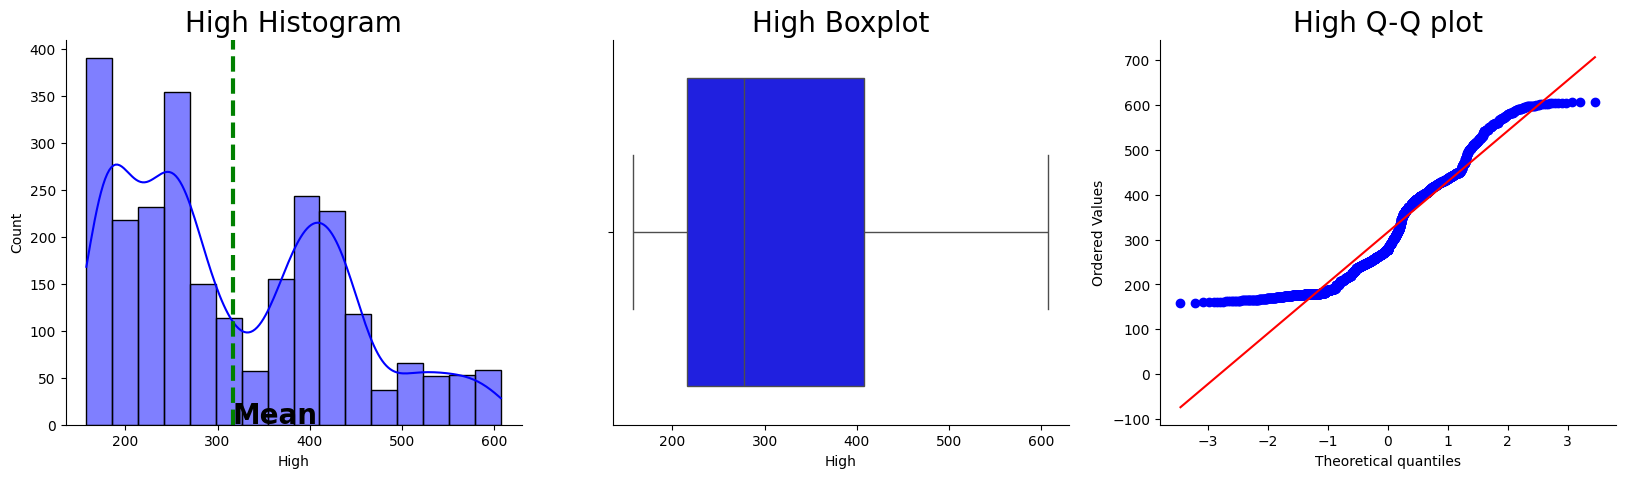

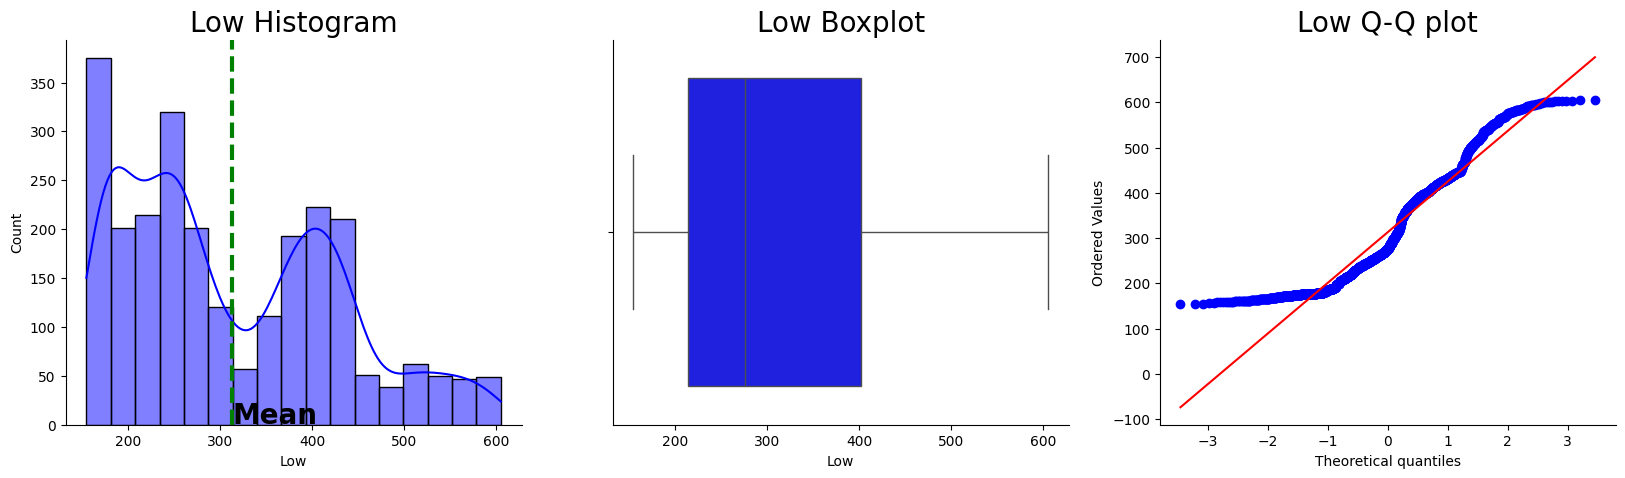

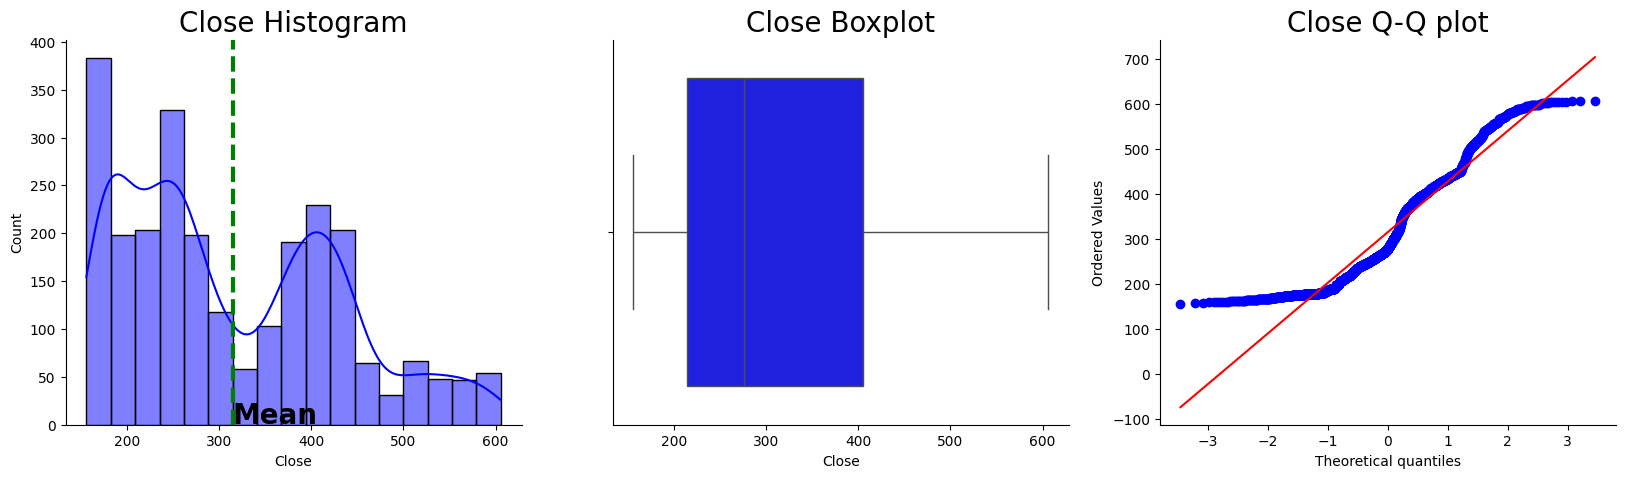

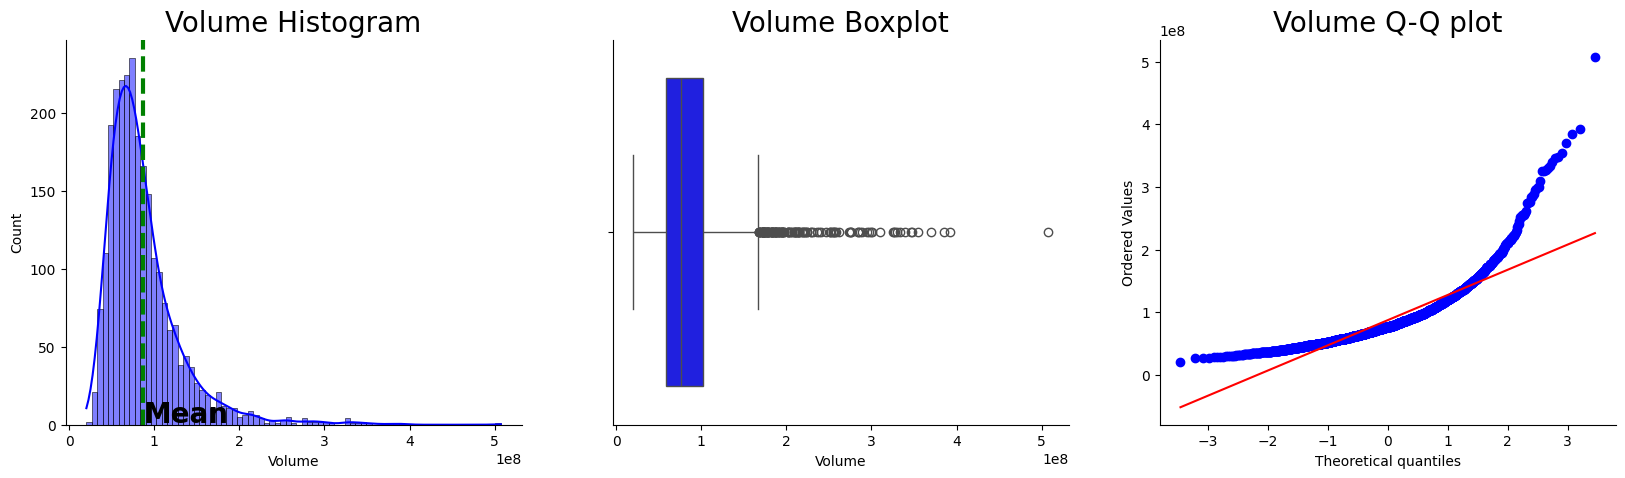

In [5]:
from eda_src.univariate import univariate_analysis

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    univariate_analysis(df,col)


### Bivariate Analysis

<Figure size 1000x600 with 0 Axes>

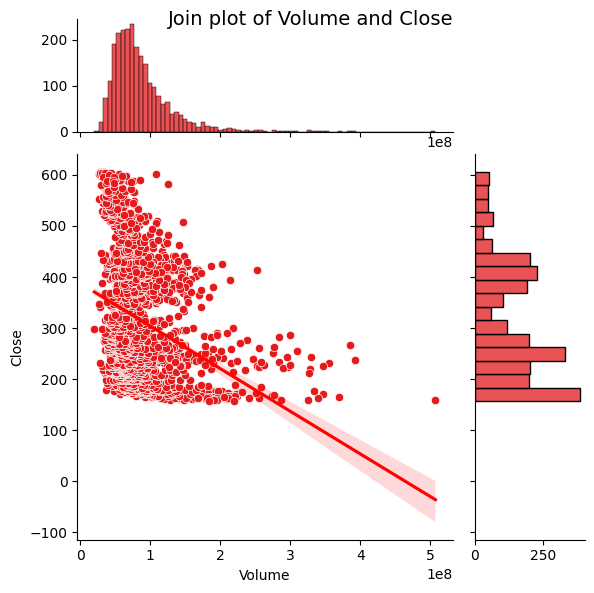

<Figure size 1000x600 with 0 Axes>

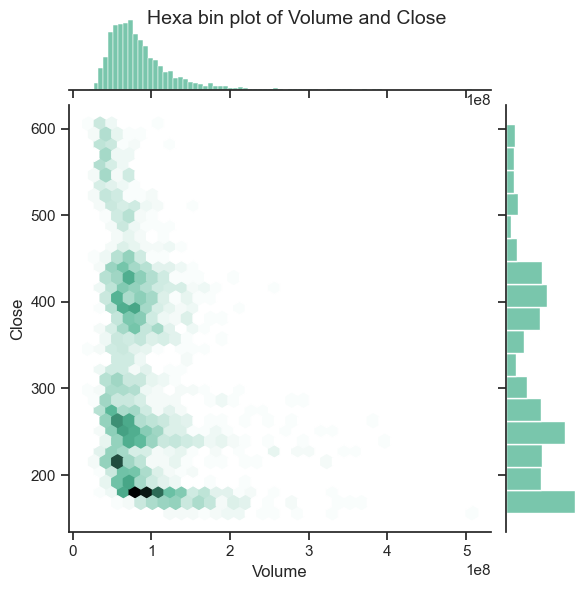

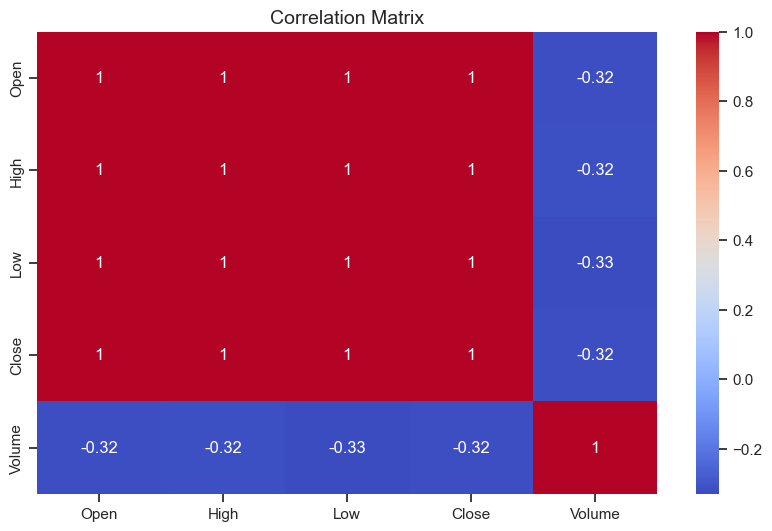

In [6]:
from eda_src.bivariate import scatter_plot,correlation_matrix,hexa_bin
scatter_plot(df, 'Volume', 'Close')
hexa_bin(df, 'Volume', 'Close')
correlation_matrix(df)

In [7]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

### Data related feature extraction

In [8]:
from Feature_extraction import feature_extractor
feature_extractor(df)

,Open,High,Low,Close,Volume,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,172.592911,173.811145,171.542718,173.391068,121465900,4,1,1,2015,2,2,1
1,169.475906,171.702310,169.165053,171.534282,169632600,0,1,1,2015,5,5,2
2,167.879684,170.316127,167.073130,169.786826,209151400,1,1,1,2015,6,6,2
3,169.971588,170.316054,168.770174,169.223851,125346700,2,1,1,2015,7,7,2
4,172.987762,173.206211,171.383078,171.399871,147217800,3,1,1,2015,8,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2519,588.630005,597.750000,586.780029,597.419983,60393100,1,1,1,2025,7,7,2
2520,589.489990,590.580017,585.200012,588.700012,47304700,2,1,1,2025,8,8,2
2521,580.489990,585.950012,578.549988,585.880005,73105000,4,1,1,2025,10,10,2
2522,581.390015,581.750000,575.349976,575.770020,47910100,0,1,1,2025,13,13,3


In [9]:
features_to_scale = [
 'hour',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear']

In [11]:

# from feature_engineering import remove_outliers,log_transform,scale_features
# # remove_outliers(df,'Close')
# log_transform(df)
# scale_features(df,features_to_scale)